# Lista 7

## zadanie 1

**Funkcja charakterystyczna.** 

Zaimplementuj próbkowy estymator funkcji
charakterystycznej i wypróbuj na typowych rozkładach

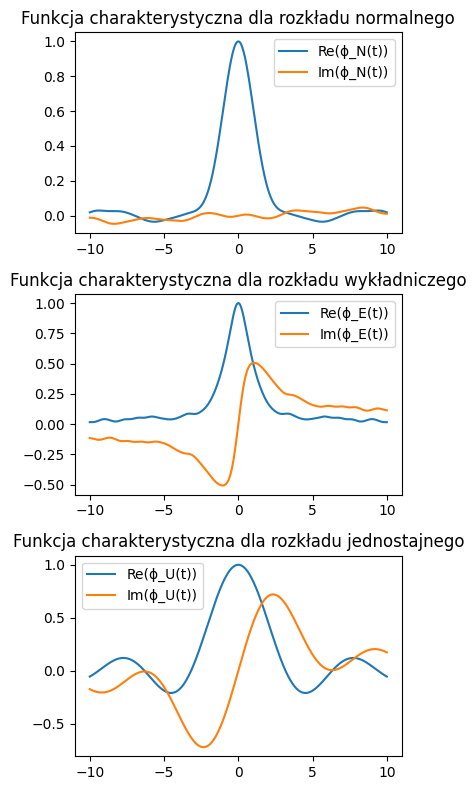

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def char_function_estimator(samples, t_values):
    n = len(samples)
    est_char_func = np.array([np.mean(np.exp(1j * t * samples)) for t in t_values])
    return est_char_func

# Generowanie próbek z różnych rozkładów
np.random.seed(42)  # dla powtarzalności wyników
sample_size = 1000

# Rozkład normalny
normal_samples = np.random.normal(loc=0, scale=1, size=sample_size)

# Rozkład wykładniczy
exponential_samples = np.random.exponential(scale=1, size=sample_size)

# Rozkład jednostajny
uniform_samples = np.random.uniform(low=0, high=1, size=sample_size)

# Wartości t dla funkcji charakterystycznej
t_values = np.linspace(-10, 10, 400)

# Estymacja funkcji charakterystycznej
normal_char_func = char_function_estimator(normal_samples, t_values)
exponential_char_func = char_function_estimator(exponential_samples, t_values)
uniform_char_func = char_function_estimator(uniform_samples, t_values)

# Wykresy funkcji charakterystycznych
plt.figure(figsize=(4, 8))

plt.subplot(3, 1, 1)
plt.plot(t_values, normal_char_func.real, label='Re(ϕ_N(t))')
plt.plot(t_values, normal_char_func.imag, label='Im(ϕ_N(t))')
plt.title('Funkcja charakterystyczna dla rozkładu normalnego')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t_values, exponential_char_func.real, label='Re(ϕ_E(t))')
plt.plot(t_values, exponential_char_func.imag, label='Im(ϕ_E(t))')
plt.title('Funkcja charakterystyczna dla rozkładu wykładniczego')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t_values, uniform_char_func.real, label='Re(ϕ_U(t))')
plt.plot(t_values, uniform_char_func.imag, label='Im(ϕ_U(t))')
plt.title('Funkcja charakterystyczna dla rozkładu jednostajnego')
plt.legend()

plt.tight_layout()
plt.show()


## zadanie 2

**Złożony proces Poissona** 

W oparciu o definicję zaimplementuj symulowanie złożonego procesu Poissona dla skoków z rozkładu $N(0,\ 1)$ oraz $C(0,\ 1)$. Stwórz
wykresy trajektorii oraz zweryfikuj poprawność symulacji korzystając ze znajomości funkcji charakterystycznej procesu.

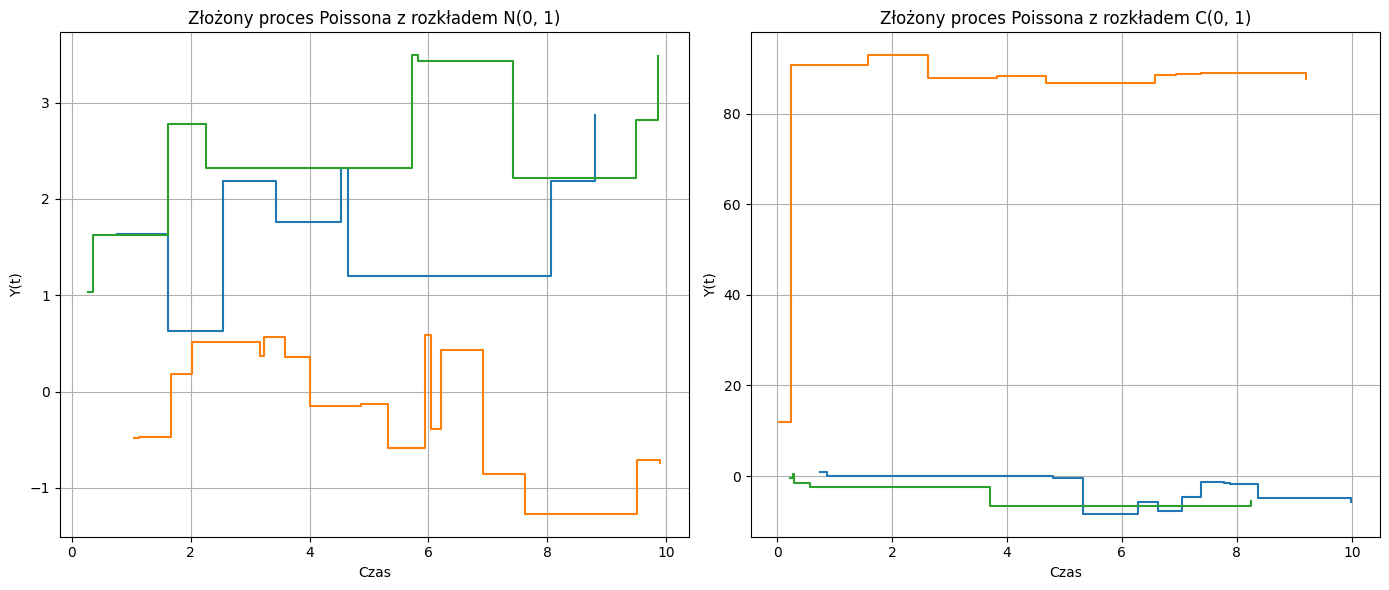

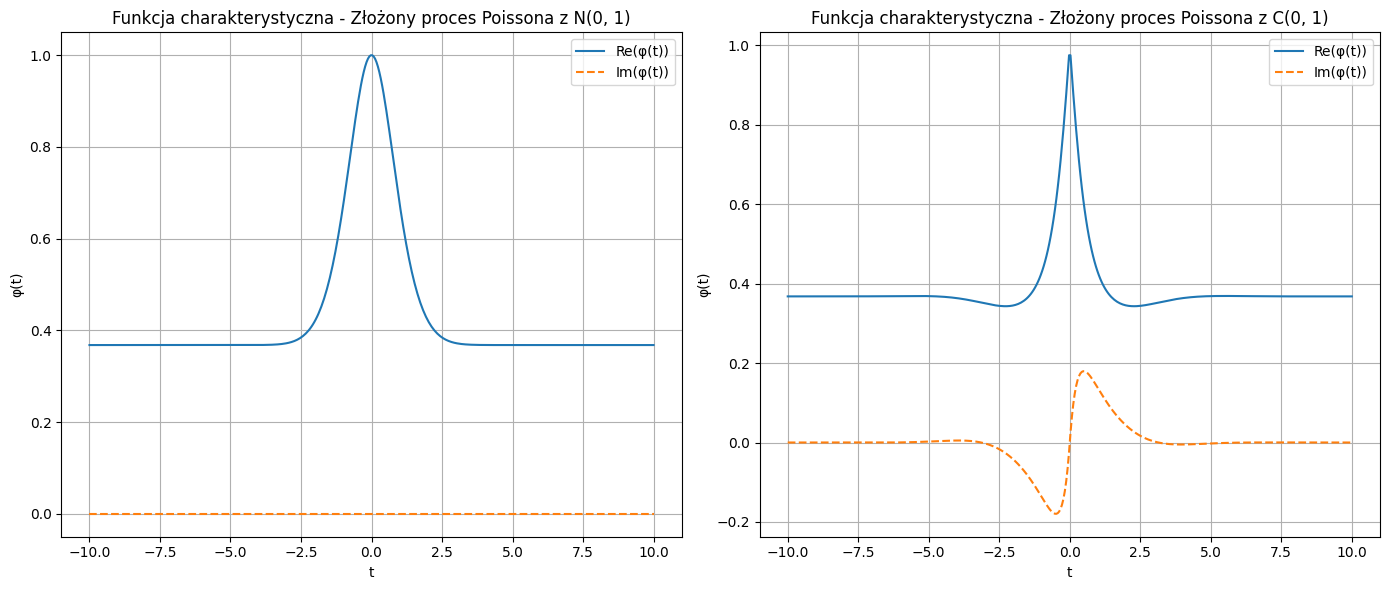

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def poisson(lam, czas, rozklad_skoku, size=1000):
    # Generowanie liczby skoków w danym czasie
    liczba_skokow = np.random.poisson(lam * czas, size=size)

    trajektorie = []
    for _ in range(size):
        if liczba_skokow[_] == 0:
            trajektorie.append((np.array([0]), np.array([0])))
        else:
            # Generowanie czasów skoków
            czasy_skokow = np.sort(np.random.uniform(0, czas, liczba_skokow[_]))
            # Generowanie wielkości skoków
            skoki = rozklad_skoku(liczba_skokow[_])
            # Złożony proces Poissona jako skumulowana suma skoków
            Y_t = np.cumsum(skoki)
            trajektorie.append((czasy_skokow, Y_t))
    
    return trajektorie

# Parametry symulacji
lam = 1  # Intensywność procesu Poissona
czas = 10  # Czas końcowy symulacji
size = 3  # Liczba trajektorii do wygenerowania

# Symulacja dla skoków z rozkładu normalnego N(0, 1)
trajektorie_normalne = poisson(lam, czas, lambda n: np.random.normal(0, 1, n), size)

# Symulacja dla skoków z rozkładu Cauchy'ego C(0, 1)
trajektorie_cauchy = poisson(lam, czas, lambda n: np.random.standard_cauchy(n), size)

# Wykresy trajektorii
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for t, Y_t in trajektorie_normalne:
    if len(t) > 1:
        plt.step(t, Y_t, where='post')
plt.title('Złożony proces Poissona z rozkładem N(0, 1)')
plt.xlabel('Czas')
plt.ylabel('Y(t)')
plt.grid(True)

plt.subplot(1, 2, 2)
for t, Y_t in trajektorie_cauchy:
    if len(t) > 1:
        plt.step(t, Y_t, where='post')
plt.title('Złożony proces Poissona z rozkładem C(0, 1)')
plt.xlabel('Czas')
plt.ylabel('Y(t)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Weryfikacja poprawności symulacji - funkcja charakterystyczna
def funkcja_charakterystyczna_poissona(t, lam, char_funkcja_skoku):
    return np.exp(lam * (char_funkcja_skoku(t) - 1))

# Funkcja charakterystyczna skoków z rozkładu normalnego N(0, 1)
def char_funkcja_normalnego(t):
    return np.exp(-0.5 * t**2)

# Funkcja charakterystyczna skoków z rozkładu Cauchy'ego C(0, 1)
def char_funkcja_cauchy(t):
    return np.exp(1j*t-np.abs(t))

# Wartości t dla wykresów funkcji charakterystycznych
t_values = np.linspace(-10, 10, 400)

# Obliczanie wartości funkcji charakterystycznych
char_funkcja_normalnego_poissona = funkcja_charakterystyczna_poissona(t_values, lam, char_funkcja_normalnego)
char_funkcja_cauchy_poissona = funkcja_charakterystyczna_poissona(t_values, lam, char_funkcja_cauchy)

# Rysowanie funkcji charakterystycznych
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(t_values, char_funkcja_normalnego_poissona.real, label='Re(φ(t))')
plt.plot(t_values, char_funkcja_normalnego_poissona.imag, label='Im(φ(t))', linestyle='--')
plt.title('Funkcja charakterystyczna - Złożony proces Poissona z N(0, 1)')
plt.xlabel('t')
plt.ylabel('φ(t)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_values, char_funkcja_cauchy_poissona.real, label='Re(φ(t))')
plt.plot(t_values, char_funkcja_cauchy_poissona.imag, label='Im(φ(t))', linestyle='--')
plt.title('Funkcja charakterystyczna - Złożony proces Poissona z C(0, 1)')
plt.xlabel('t')
plt.ylabel('φ(t)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()